In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [43]:
housedf=pd.read_csv('house_price2 (2).csv')

In [44]:
housedf.head()

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,2,18,610000
3,3600,3,30,595000
4,4000,5,8,760000


In [45]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      6 non-null      int64
 1   bedrooms  6 non-null      int64
 2   age       6 non-null      int64
 3   price     6 non-null      int64
dtypes: int64(4)
memory usage: 324.0 bytes


In [46]:
housedf.describe()

,area,bedrooms,age,price
count,6.000000,6.000000,6.000000,6.000000
mean,3416.666667,3.833333,16.500000,648333.333333
std,587.934237,1.471960,8.288546,109117.673484
min,2600.000000,2.000000,8.000000,550000.000000
25%,3050.000000,3.000000,9.750000,572500.000000
50%,3400.000000,3.500000,16.500000,602500.000000
75%,3900.000000,4.750000,19.500000,722500.000000
max,4100.000000,6.000000,30.000000,810000.000000


In [47]:
housedf.columns

Index(['area', 'bedrooms', 'age', 'price'], dtype='object')

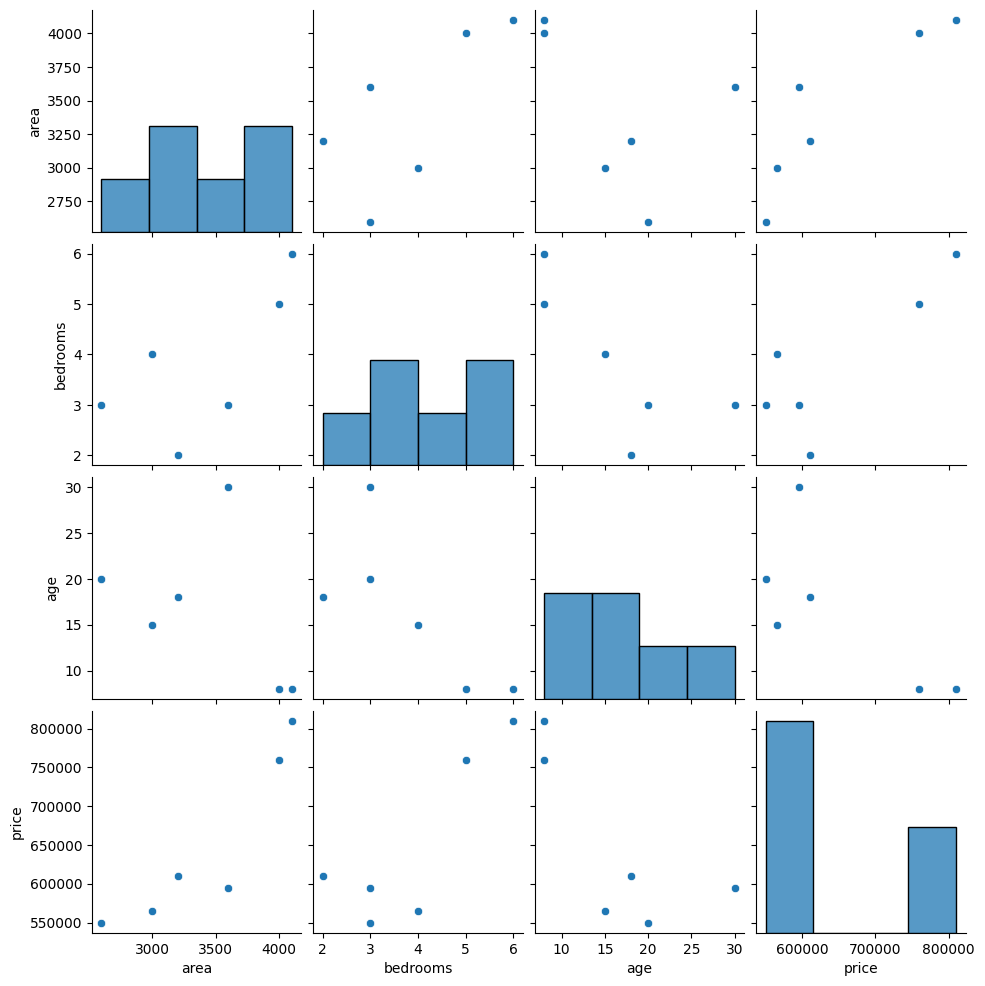

In [48]:
sns.pairplot(housedf)

<Axes: >

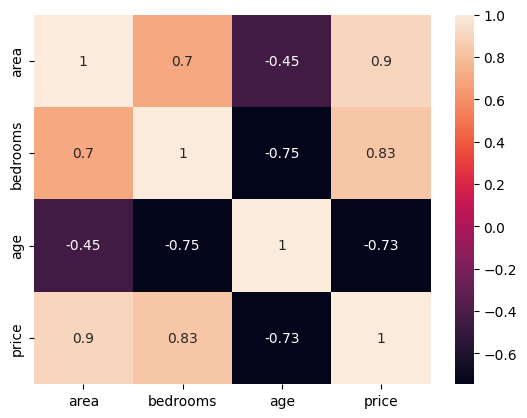

In [49]:
sns.heatmap(housedf.corr(),annot=True)

In [50]:
X = housedf[['area', 'bedrooms', 'age']]
y = housedf['price']

In [51]:
from sklearn.model_selection import train_test_split


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
#from sklearn.linear_model import LinearRegression
X_train

,area,bedrooms,age
5,4100,6,8
2,3200,2,18
4,4000,5,8
3,3600,3,30


In [54]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()

In [69]:
ln.fit(X_train,y_train)
y_pred = ln.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 28816705246.912857
R-squared: -511.2969821673397


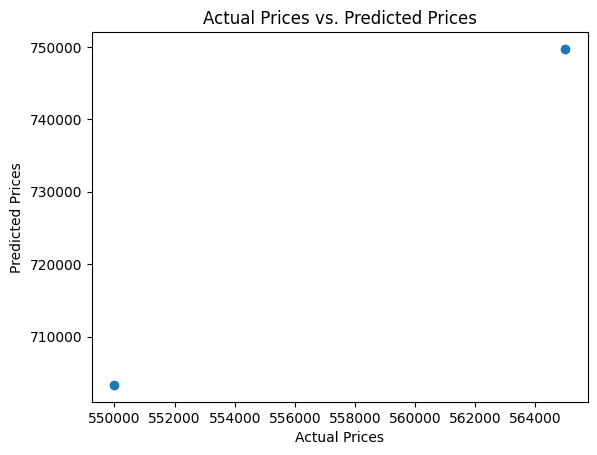

In [70]:

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()#coeff_dfhouse=pd.DataFrame(ln.coef_,X.columns,columns=['Coefficient'])

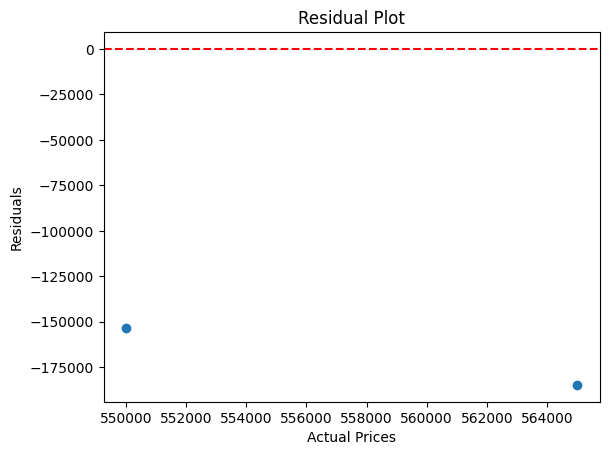

Predicted Price: 612166.6666666658


C:\Pyhton311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [80]:
#coeff_dfhouse
# We can also create a residual plot to check the model's performance
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Lastly, let's use the trained model to make predictions on new data and visualize the results
new_data = [[3320, 2, 15 ]]
predicted_price = ln.predict(new_data)
print("Predicted Price:", predicted_price[0])